## Problem Statement
Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 

### Data Description
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

In [1]:
# Importing Dependenices
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('/Users/ag/Downloads/EastWestAirlines.xlsx',sheet_name='data')

## EDA

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.shape

(3999, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
# Renaming Columns
df.rename(columns={'ID#':'ID','Award?':'Award'}, inplace=True)

## Correlation, Skewness & Kurtosis

In [8]:
df.corr()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


<AxesSubplot:>

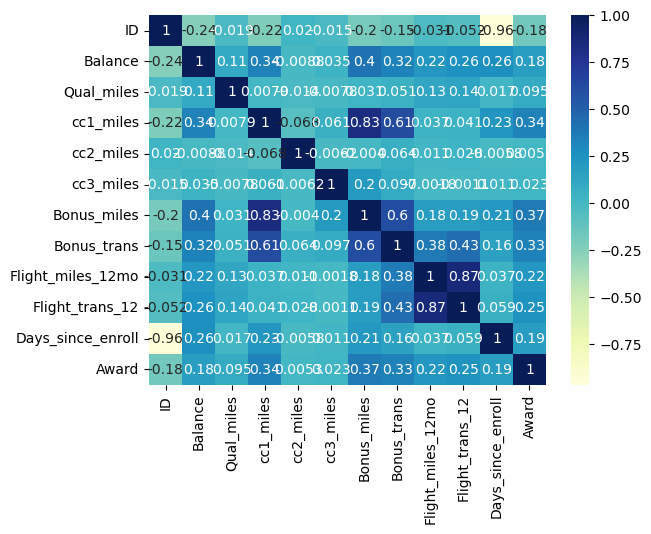

In [9]:
# plotting Correlation plot
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [10]:
df.skew()

ID                   -0.003343
Balance               5.004187
Qual_miles            7.512395
cc1_miles             0.857569
cc2_miles            11.210459
cc3_miles            17.195532
Bonus_miles           2.842093
Bonus_trans           1.157362
Flight_miles_12mo     7.451666
Flight_trans_12       5.490461
Days_since_enroll     0.120174
Award                 0.537200
dtype: float64

In [11]:
df.kurtosis()

ID                    -1.199648
Balance               44.157932
Qual_miles            67.689351
cc1_miles             -0.748508
cc2_miles            133.786489
cc3_miles            308.654728
Bonus_miles           13.630489
Bonus_trans            2.745737
Flight_miles_12mo     94.761019
Flight_trans_12       42.978152
Days_since_enroll     -0.967505
Award                 -1.712272
dtype: float64

#### Upon checking found that the all the Columns in data has Postive skewness except id
#### ID Columns has Negative Skewness
#### Upon checking found that the all the Columns in data has Postive Kurtosis except id,cc1_miles,Days_since_enroll,Award
#### id,cc1_miles,Days_since_enroll,Award Columns has Negative Kurtosis

In [12]:
#Checking for missing values
df.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

<AxesSubplot:>

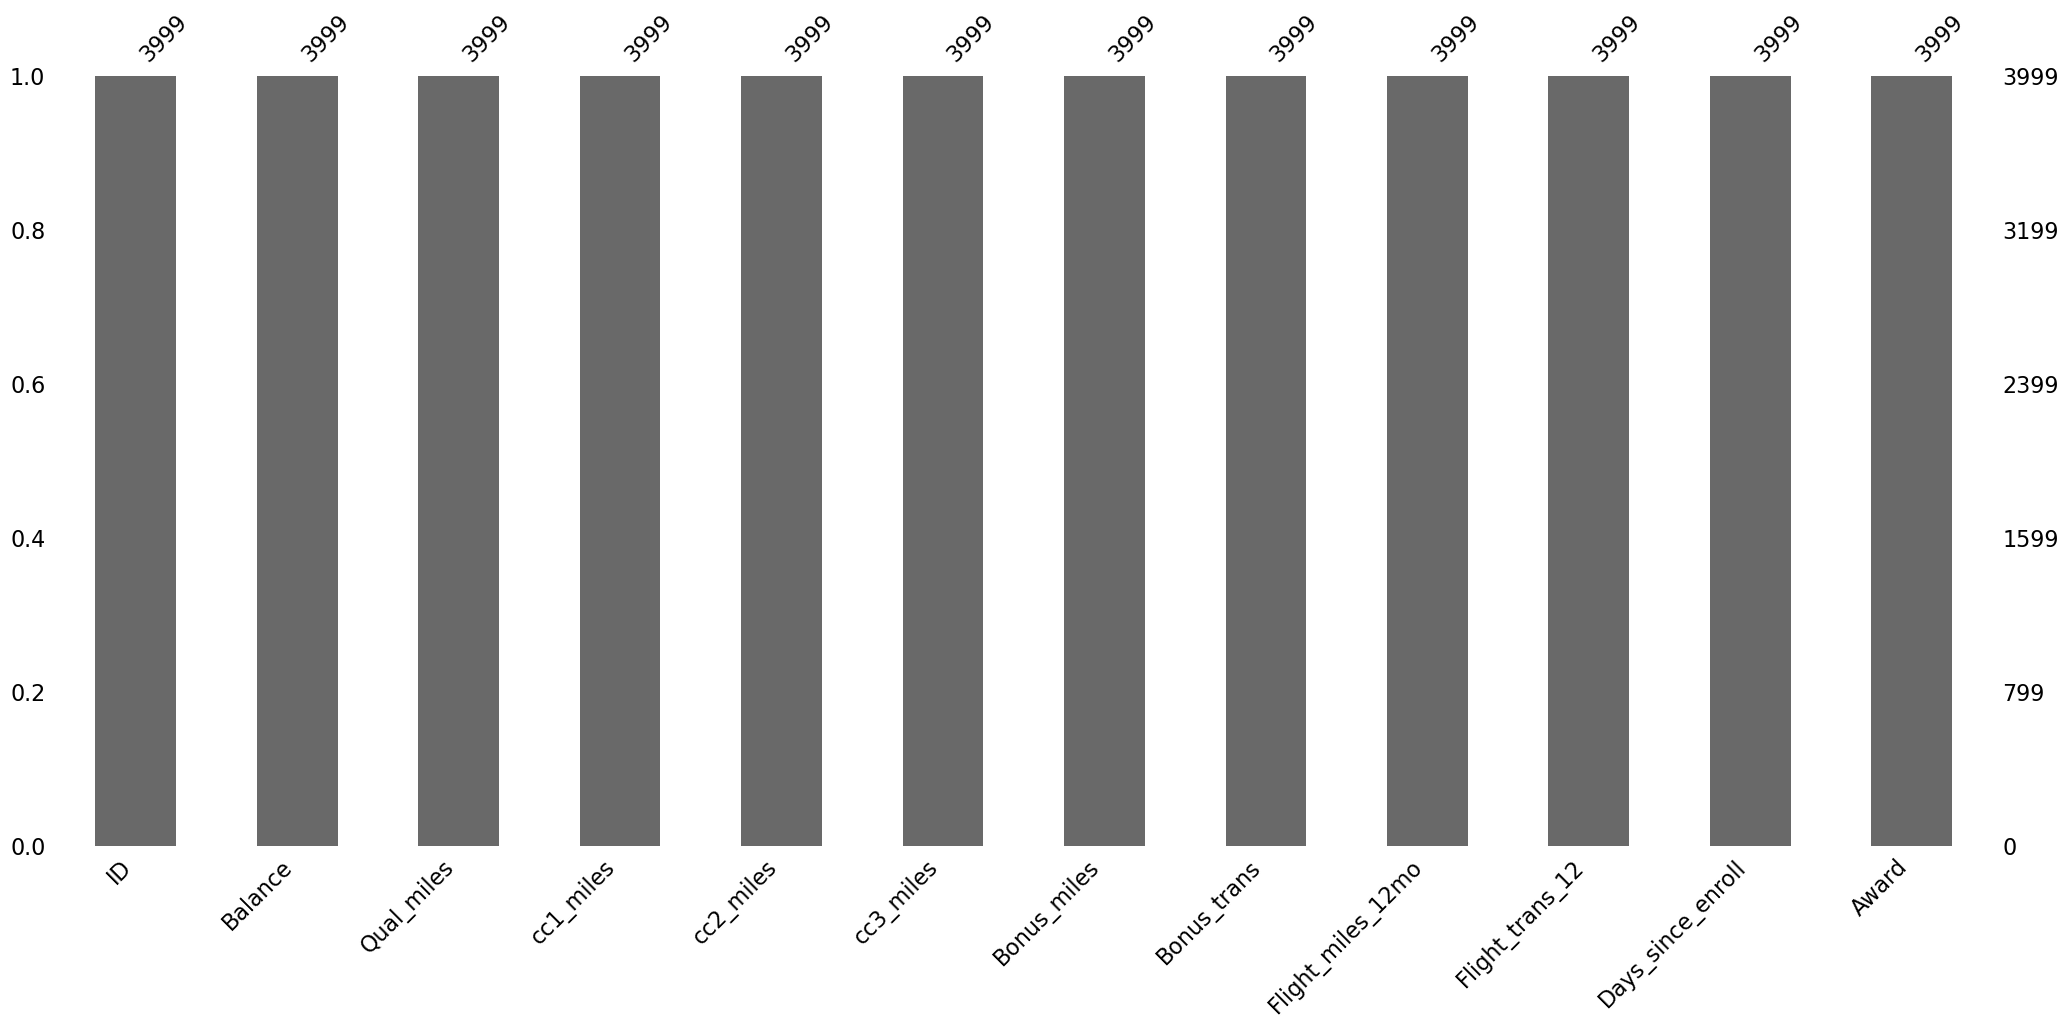

In [13]:
# Visualizing Missing Data
import missingno as msno
msno.bar(df)

In [14]:
X = df.drop(columns=['Award'])
y = df.Award

## Hierarchical Clustering

In [15]:
# Importing Hierarchical Clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [16]:
from sklearn.preprocessing import Normalizer

In [17]:
norm = Normalizer()

In [18]:
X_norm = norm.fit_transform(X)

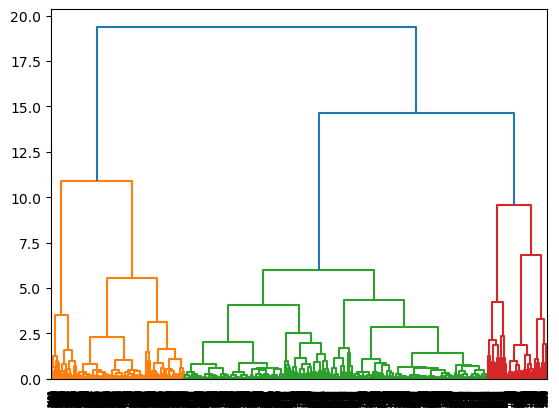

In [19]:
# create dendrogram using method as ward
dendrogram = sch.dendrogram(sch.linkage(X_norm, method='ward'))

In [20]:
print(dendrogram['color_list'])

['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1

In [21]:
unique_colour = set(dendrogram['color_list'])
unique_colour

{'C0', 'C1', 'C2', 'C3'}

In [22]:
optimal_number = len(unique_colour)-1

In [23]:
hc = AgglomerativeClustering(n_clusters=optimal_number, affinity = 'euclidean', linkage = 'ward')

In [24]:
y_hc = hc.fit_predict(X_norm)

In [25]:
df['ward_cluster'] = y_hc

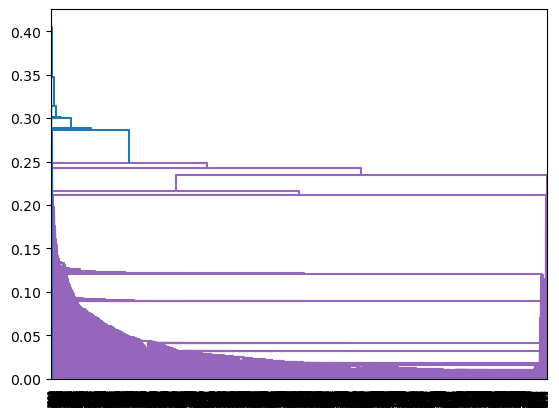

In [26]:
# create dendrogram using method as single
dendrogram1 = sch.dendrogram(sch.linkage(X_norm, method='single'))

In [27]:
print(dendrogram1['color_list'])

['C1', 'C2', 'C3', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4

In [28]:
unique_colour1 = set(dendrogram1['color_list'])
unique_colour1

{'C0', 'C1', 'C2', 'C3', 'C4'}

In [29]:
optimal_number1 = len(unique_colour1)-1

In [30]:
hc1 = AgglomerativeClustering(n_clusters=optimal_number1, affinity = 'euclidean', linkage = 'single')

In [31]:
y_hc1 = hc1.fit_predict(X_norm)

In [32]:
y_hc1

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
df['single_cluster'] = y_hc1

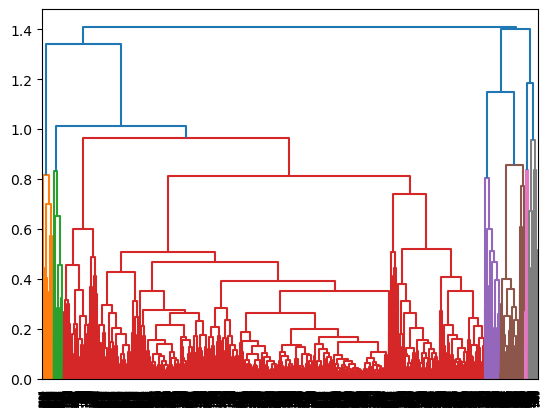

In [34]:
# create dendrogram using method as complete
dendrogram2 = sch.dendrogram(sch.linkage(X_norm, method='complete'))

In [35]:
print(dendrogram2['color_list'])

['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2

In [36]:
unique_colour2 = set(dendrogram1['color_list'])
unique_colour

{'C0', 'C1', 'C2', 'C3'}

In [37]:
optimal_number2 = len(unique_colour2)-1

In [38]:
hc2 = AgglomerativeClustering(n_clusters=optimal_number2, affinity = 'euclidean', linkage = 'complete')

In [39]:
y_hc2 = hc2.fit_predict(X_norm)

In [40]:
y_hc2

array([1, 1, 1, ..., 1, 1, 3])

In [41]:
df['complete_cluster'] = y_hc2

In [42]:
# Checking the Valuecounts for clusters
df['complete_cluster'].value_counts()

1    3479
2     324
0     101
3      95
Name: complete_cluster, dtype: int64

In [43]:
# Checking the Valuecounts for clusters
df['single_cluster'].value_counts()

0    3995
2       2
3       1
1       1
Name: single_cluster, dtype: int64

In [44]:
# Checking the Valuecounts for clusters
df['ward_cluster'].value_counts()

2    2446
0    1078
1     475
Name: ward_cluster, dtype: int64

<AxesSubplot:xlabel='ward_cluster', ylabel='count'>

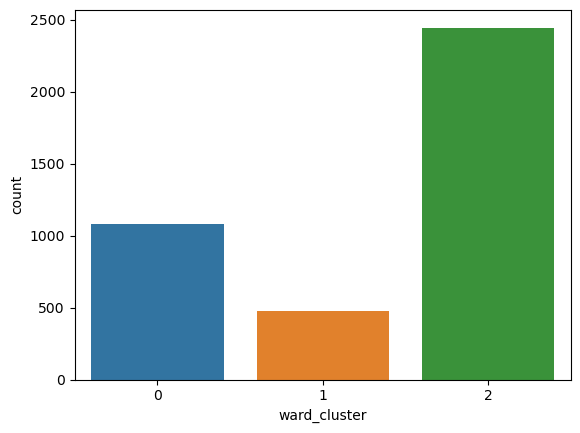

In [45]:
#Plotting Valuecount plot
sns.countplot(x='ward_cluster', data=df)

<AxesSubplot:xlabel='single_cluster', ylabel='count'>

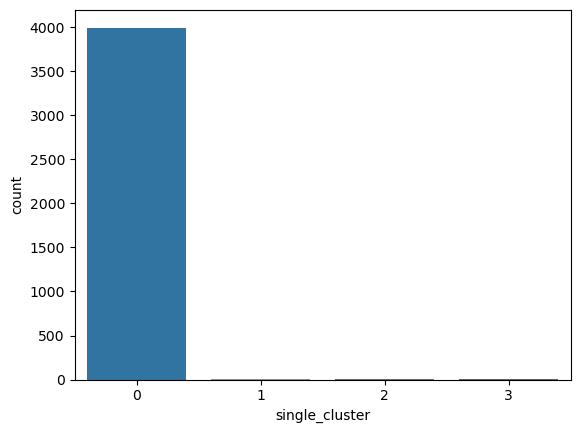

In [46]:
# plotting the Valuecounts for formed clusters
sns.countplot(x='single_cluster', data=df)

<AxesSubplot:xlabel='complete_cluster', ylabel='count'>

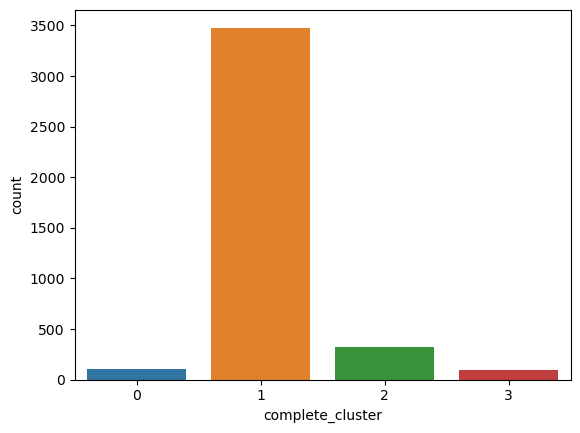

In [47]:
# plotting the Valuecounts for formed clusters
sns.countplot(x='complete_cluster', data=df)

### Summary
#### There are no Missing values in the dataset
#### There is no correlation in between the columns in the dataset
#### The data is postively Skewed and also has Postive Kurtosis
#### When used "ward' as linkage parameter the dendogram has resulted in 3 Clusters and when plotted a graph of resulting clusters the data is distributed between the three clusters
#### When used "single' as linkage parameter the dendogram has resulted in 4 Clusters and when plotted a graph of resulting clusters the most of the data is in the Zeroth Cluster.
#### When used "complete' as linkage parameter the dendogram has resulted in 4 Clusters and when plotted a graph of resulting clusters the most of the data is in the First Cluster and in the second cluster with very few datapoints in 0 & 3
#### Considering the Data Distribution Ward linkage looks good in estimating the data.

# KMeans Clustering

In [48]:
# Importing k-Means dependencies
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [49]:
Data = pd.read_excel('/Users/ag/Downloads/EastWestAirlines.xlsx',sheet_name='data')

In [50]:
Data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [51]:
X = Data.drop(columns=['Award?'])
y = Data.Award?

Object `Data.Award` not found.


In [52]:
#using MinMaxScaler
scaled = MinMaxScaler()

In [53]:
X_scaled = scaled.fit_transform(X)

### Elbow Plot for MinMaxScaled Data

In [54]:
#Checking the optimum No. of Clusters using Elbow plot
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X_scaled)
    sse.append(km.inertia_)

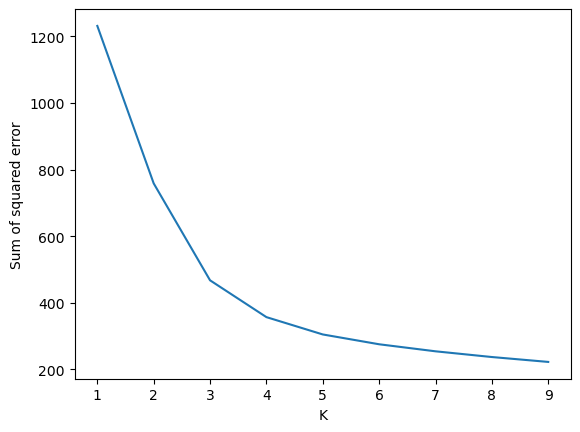

In [55]:
# Plotting the elbow plot
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [56]:
#Predicting the Clusters
km = KMeans(n_clusters=5)
y_pred = km.fit_predict(X_scaled)

In [57]:
Data['cluster']=y_pred

In [58]:
Data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [59]:
# Scaling using StandardScaler
scaler = StandardScaler()

In [60]:
X_scaler = scaler.fit_transform(X)

### Elbow plot for StandardScaler Data

In [61]:
#Checking the optimum No. of Clusters using Elbow plot
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X_scaler)
    sse.append(km.inertia_)

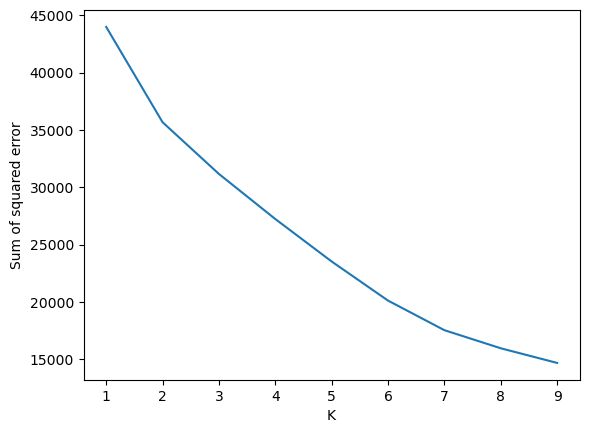

In [62]:
# Plotting the elbow plot
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [63]:
#Predicting the Clusters
km = KMeans(n_clusters=7)
y_pred1 = km.fit_predict(X_scaler)

In [64]:
Data['cluster_Std']=y_pred1

In [65]:
Data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,cluster_Std
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,3


In [66]:
# Finding the Valuecounts for formed due to clustering
Data['cluster'].value_counts()

1    1114
0     830
4     766
2     660
3     629
Name: cluster, dtype: int64

In [67]:
# Finding the Valuecounts for formed due to clustering
Data['cluster_Std'].value_counts()

3    1541
2    1313
0     900
1     132
4      55
6      43
5      15
Name: cluster_Std, dtype: int64

<AxesSubplot:xlabel='cluster', ylabel='count'>

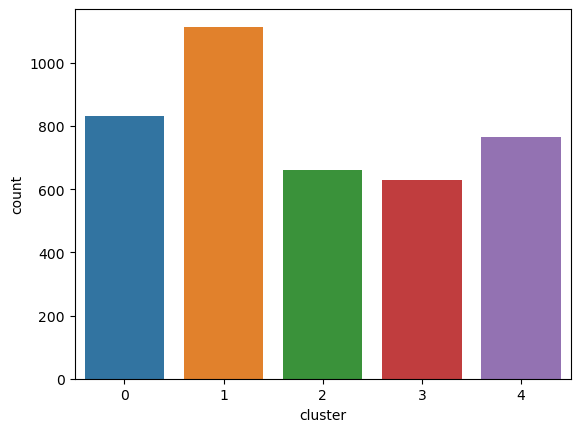

In [68]:
# plotting the Valuecounts for formed clusters
sns.countplot(x='cluster', data=Data)

<AxesSubplot:xlabel='cluster_Std', ylabel='count'>

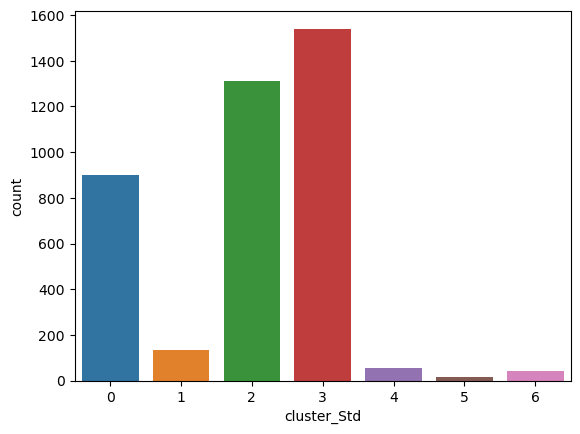

In [69]:
# plotting the Valuecounts for formed clusters
sns.countplot(x='cluster_Std', data=Data)

## Summary
#### When used MinMaxScaler and plotted an Elbow Plot found the optimum number of cluster value to be 5.
#### Plotting a graph of resulting cluster has showen highest number of points in 0th cluster followed by 4, 2, 3 & 1.
#### When used StandardScaler and plotted an Elbow Plot found the optimum number of cluster value to be 7.
#### Plotting a graph of resulting cluster has showen highest number of points in 0th cluster followed by 1, 5,2,4, 3 & 6.
#### Kmeans Doesnt provide any insights of outliers

## DBScan

In [70]:
DataFrame = pd.read_excel('/Users/ag/Downloads/EastWestAirlines.xlsx',sheet_name='data')

In [71]:
DataFrame.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [72]:
# using StandardScaler for scaling
scaled = StandardScaler()

In [73]:
DataFrame.shape

(3999, 12)

In [74]:
X = DataFrame.drop(columns=['Award?'])
y = DataFrame.Award?

Object `DataFrame.Award` not found.


In [75]:
X_scaled = pd.DataFrame(scaled.fit_transform(X), columns=X.columns)

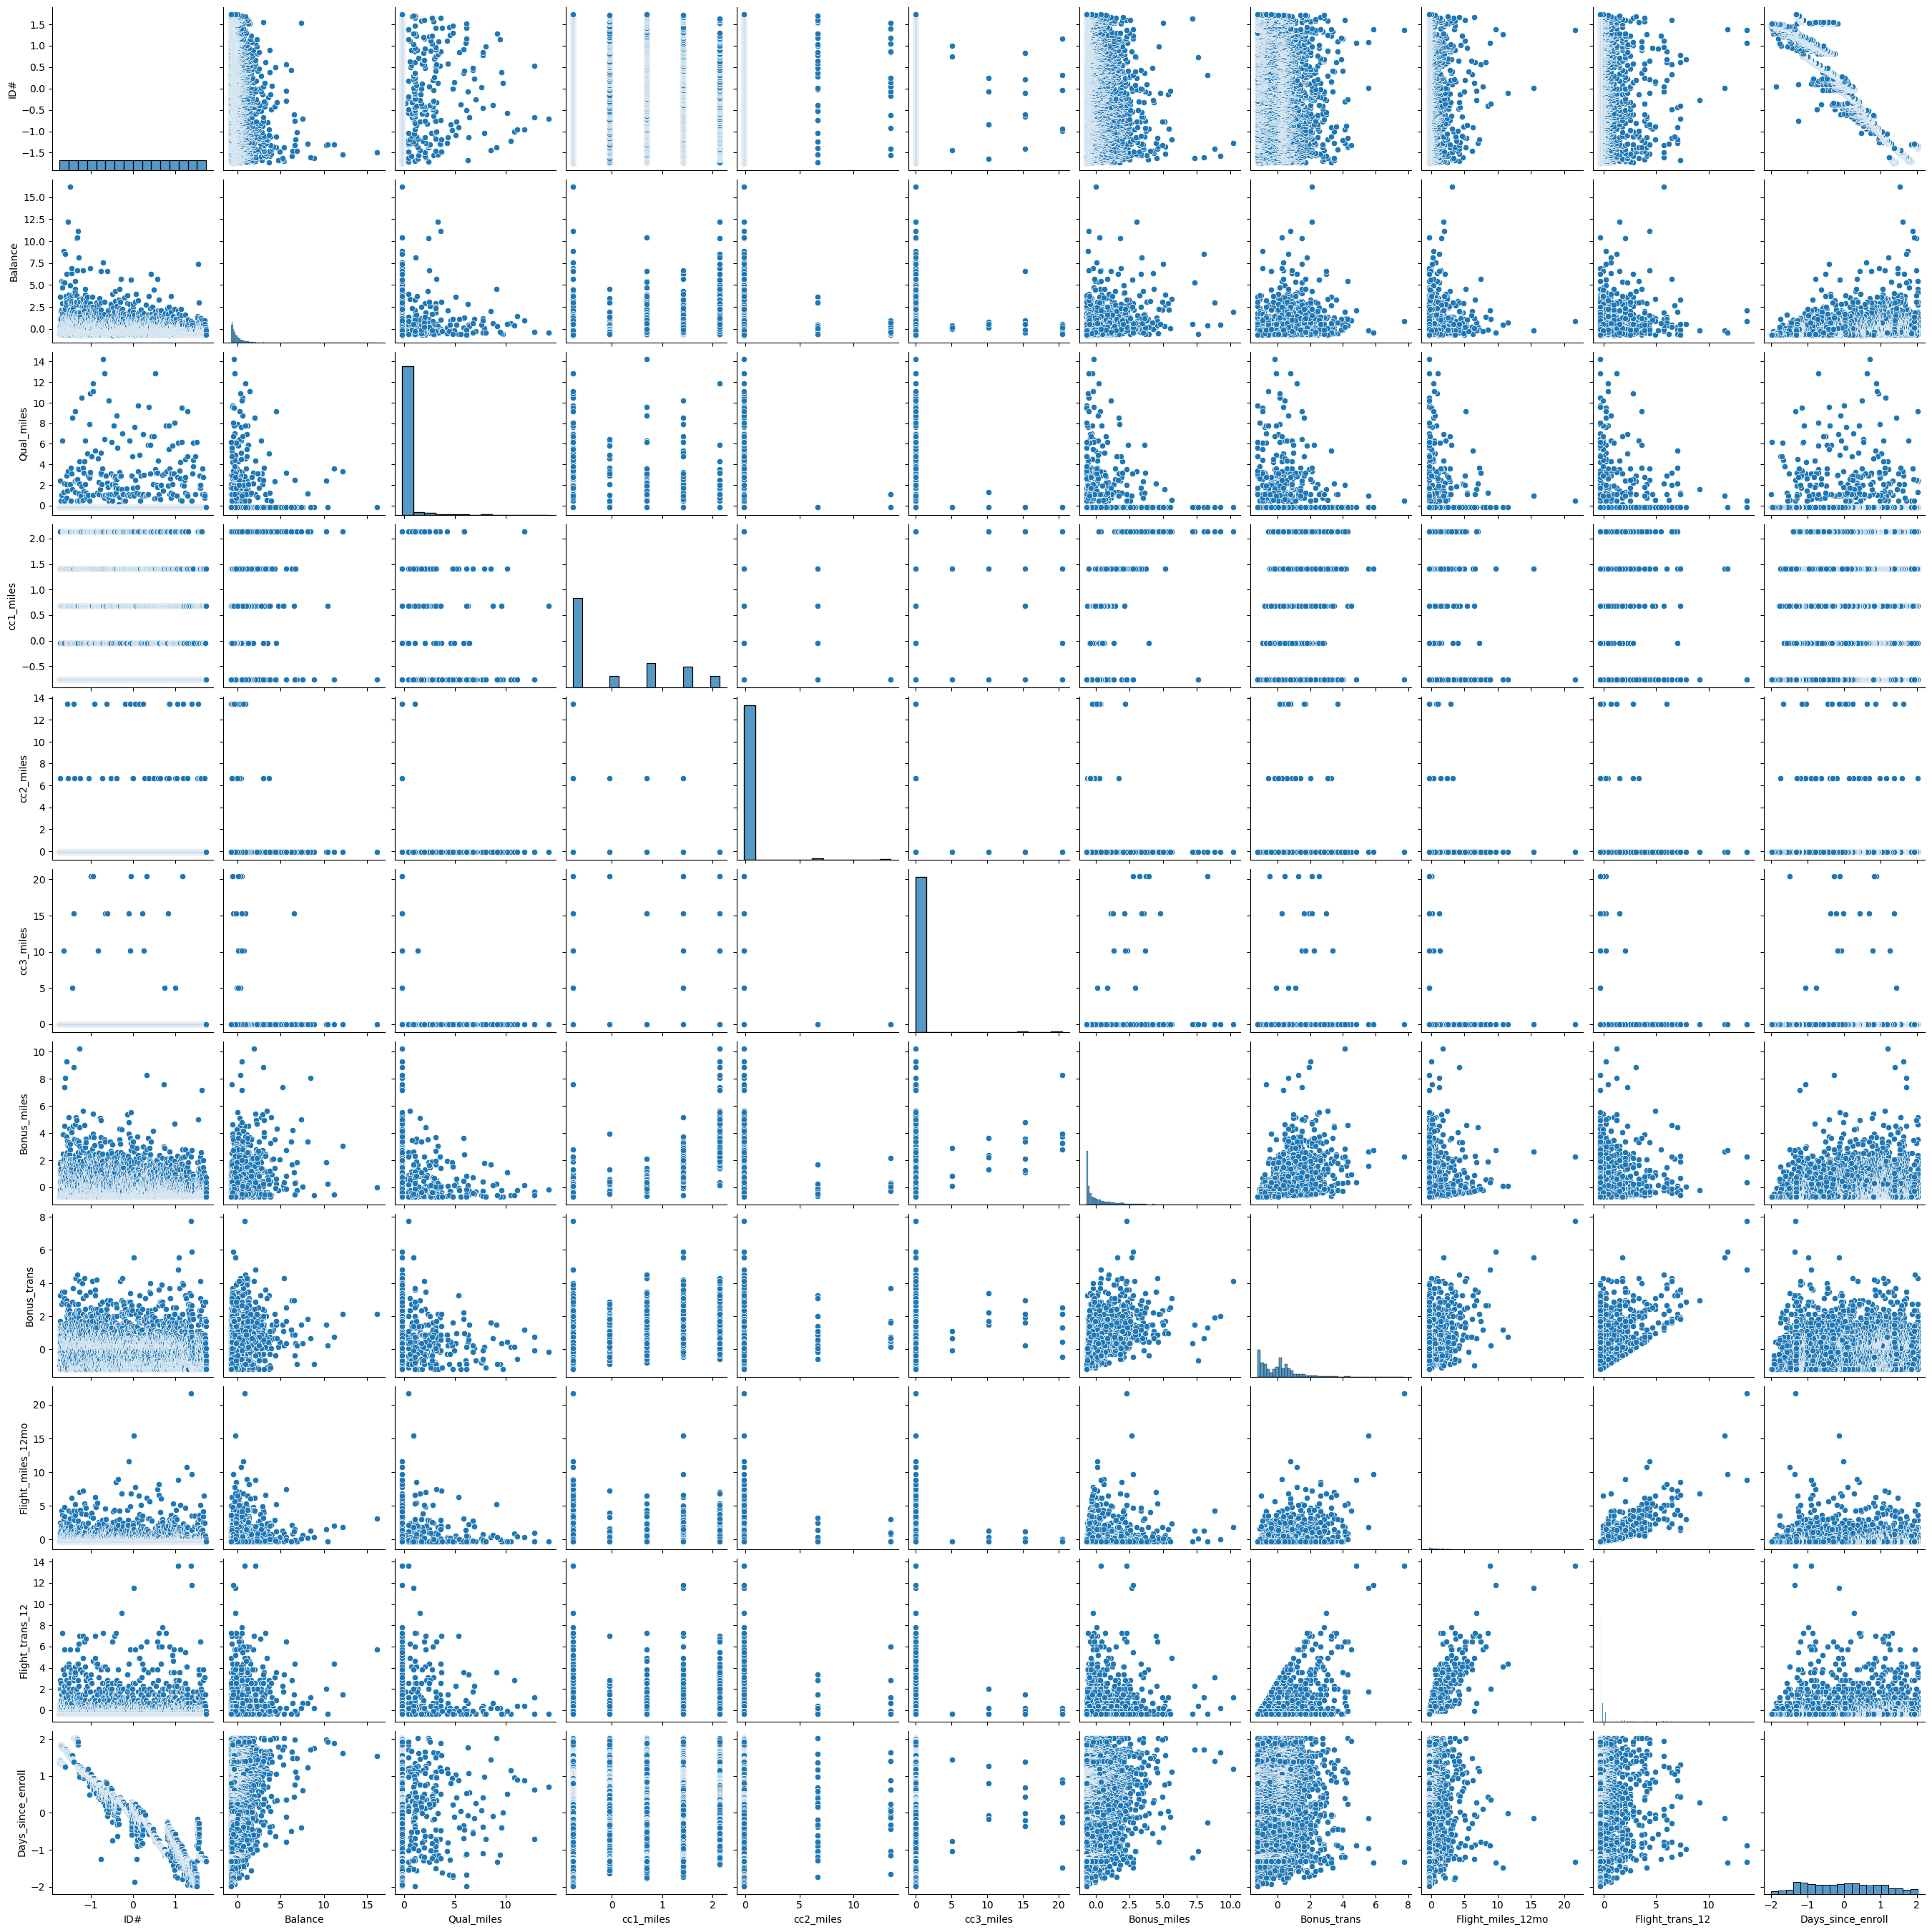

In [76]:
# Visulaizing the data
sns.pairplot(X_scaled)

In [77]:
# Importing dependencies for DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

In [78]:
# Finding the optimal eps value
# Consdering the n_neighbors value as 20
nn = NearestNeighbors(n_neighbors=20).fit(X_scaler)
distances, indices = nn.kneighbors(X_scaler)

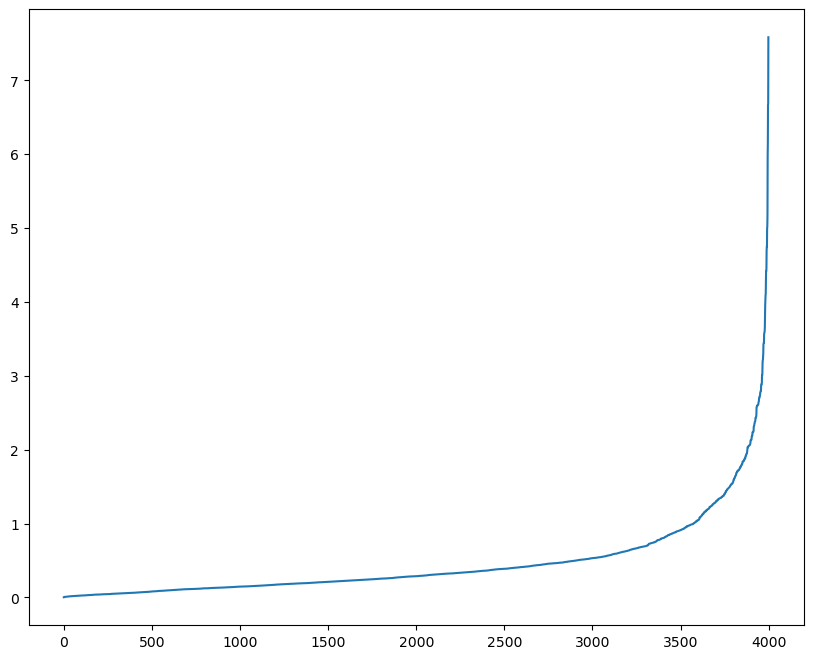

In [79]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)

In [80]:
# Lets consider eps range 0.05 to 0.013 and _min_sample_ range 10 to 21 and iterate over these combinations and get the best silhouette score.
min_samples = range(10,21)
eps = np.arange(0.05,0.13, 0.01) # returns array of ranging from 0.05 to 0.13 with step of 0.01

In [81]:
#Get the parameters for best silhouette score
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

NameError: name 'output' is not defined

In [ ]:
from collections import Counter
labels = DBSCAN(min_samples=min_samples, eps = 0.12).fit(X_scaler).labels_
clusters = len(Counter(labels))
print(f"Number of clusters: {clusters}")
print(f"Number of outliers: {Counter(labels)[-1]}")
print(f"Silhouette_score: {silhouette_score(X_scaler, labels)}")

In [ ]:
DataFrame['labels'] = labels

In [ ]:
DataFrame['labels'].value_counts()

In [ ]:
# plotting the Valuecounts for formed clusters
sns.countplot(x='labels', data=DataFrame)

## Summary
#### NearestNeighbors can be used to get the estimated distance between the datapoints which can be used as eps in DBSCAN, _n_neighbors_ in NearestNeighbors can be used as _min_sample_ in DBSCAN.

#### When used MinMaxScaled Data DBScan detected 522 points as Outliers with a silhouette_score of 0.06732451721212158.